# Text Mining

## Contents <a id=ov>
1. [Data Set](#data)
2. [Wordbook sentiment](#wordbook)
3. [Topic Modeling](#lda)





## Data Set <a id=data>
[Back to Content Overview](#ov)

The data set consists of all speeches of high ranking ECB representatives. (https://www.ecb.europa.eu/press/key/html/downloads.en.html)

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from tqdm import tqdm

In [23]:
#Import data from a excel_file
df=pd.read_csv('all_ECB_speeches.csv',sep='|')
print(df)

            date              speakers  \
0     2023-02-27                   NaN   
1     2023-02-16        Philip R. Lane   
2     2023-02-16         Fabio Panetta   
3     2023-02-15     Christine Lagarde   
4     2023-02-07                   NaN   
...          ...                   ...   
2656  1997-05-13  Alexandre Lamfalussy   
2657  1997-04-30  Alexandre Lamfalussy   
2658  1997-04-22  Alexandre Lamfalussy   
2659  1997-03-10  Alexandre Lamfalussy   
2660  1997-02-07  Alexandre Lamfalussy   

                                                  title  \
0     Macro-Financial Stability in the EU: Some Less...   
1     The euro area hiking cycle: an interim assessment   
2                Monetary policy after the energy shock   
3     European Parliament plenary debate on the ECB ...   
4          Monetary policy in times of pandemic and war   
...                                                 ...   
2656  The European Central Bank: independent and acc...   
2657  The operation of 

In [24]:
# Take a small sample to test you code efficiently.
#df=df.sample(frac=0.1)

In [25]:
# Change the index to apply time series methods
df.index=pd.to_datetime(df['date'])
print(df)

                  date              speakers  \
date                                           
2023-02-27  2023-02-27                   NaN   
2023-02-16  2023-02-16        Philip R. Lane   
2023-02-16  2023-02-16         Fabio Panetta   
2023-02-15  2023-02-15     Christine Lagarde   
2023-02-07  2023-02-07                   NaN   
...                ...                   ...   
1997-05-13  1997-05-13  Alexandre Lamfalussy   
1997-04-30  1997-04-30  Alexandre Lamfalussy   
1997-04-22  1997-04-22  Alexandre Lamfalussy   
1997-03-10  1997-03-10  Alexandre Lamfalussy   
1997-02-07  1997-02-07  Alexandre Lamfalussy   

                                                        title  \
date                                                            
2023-02-27  Macro-Financial Stability in the EU: Some Less...   
2023-02-16  The euro area hiking cycle: an interim assessment   
2023-02-16             Monetary policy after the energy shock   
2023-02-15  European Parliament plenary debate on 

In [26]:
print(df.resample('M').count())

            date  speakers  title  subtitle  contents
date                                                 
1997-02-28     1         1      1         1         1
1997-03-31     1         1      1         1         1
1997-04-30     2         2      2         2         2
1997-05-31     1         1      1         1         1
1997-06-30     3         3      3         3         3
...          ...       ...    ...       ...       ...
2022-10-31     3         3      3         3         2
2022-11-30    16        16     16        16        13
2022-12-31     5         5      5         5         3
2023-01-31     4         4      4         4         3
2023-02-28     5         3      5         5         3

[313 rows x 5 columns]


Text(0.5, 1.0, 'Articles per Month')

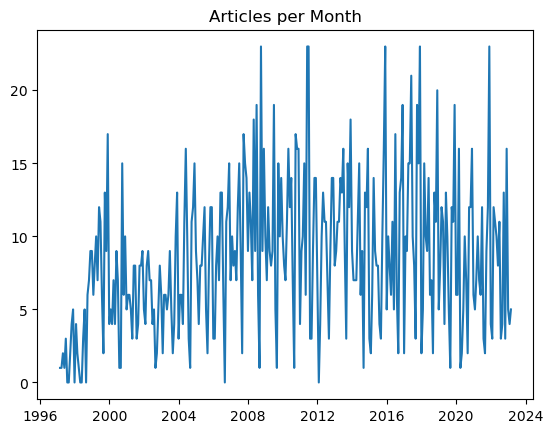

In [27]:
#Plot the Articles per Month
plt.plot(df.resample('M').count()['date'])
plt.title('Articles per Month')

In [28]:
import plotly.graph_objects as go
import plotly.express as px
fig=go.Figure(go.Bar(x=df.resample('Y').count().index,y=df.resample('Y').count()['date']))
fig

## Word book sentiment

The easiest way to measure the sentiment of texts is to count prelabeled keywords:

In [29]:
# Load the wordbook file
word_book=pickle.load(open('newwordbook.p','rb'))
print(word_book)

[['negative', ['abandon', 'abandoned', 'abandoning', 'abandonment', 'abandonments', 'abandons', 'abdicated', 'abdicates', 'abdicating', 'abdication', 'abdications', 'aberrant', 'aberration', 'aberrational', 'aberrations', 'abetting', 'abnormal', 'abnormalities', 'abnormality', 'abnormally', 'abolish', 'abolished', 'abolishes', 'abolishing', 'abrogate', 'abrogated', 'abrogates', 'abrogating', 'abrogation', 'abrogations', 'abrupt', 'abruptly', 'abruptness', 'absence', 'absences', 'absenteeism', 'abuse', 'abused', 'abuses', 'abusing', 'abusive', 'abusively', 'abusiveness', 'accident', 'accidental', 'accidentally', 'accidents', 'accusation', 'accusations', 'accuse', 'accused', 'accuses', 'accusing', 'acquiesce', 'acquiesced', 'acquiesces', 'acquiescing', 'acquit', 'acquits', 'acquittal', 'acquittals', 'acquitted', 'acquitting', 'adulterate', 'adulterated', 'adulterating', 'adulteration', 'adulterations', 'adversarial', 'adversaries', 'adversary', 'adverse', 'adversely', 'adversities', 'adv

<span style="color:blue"><b>Task:</b></span> Convert this word_book object in a more useful data structure!

In [30]:
word_book={key:words for key,words in word_book}
print(word_book)


{'negative': ['abandon', 'abandoned', 'abandoning', 'abandonment', 'abandonments', 'abandons', 'abdicated', 'abdicates', 'abdicating', 'abdication', 'abdications', 'aberrant', 'aberration', 'aberrational', 'aberrations', 'abetting', 'abnormal', 'abnormalities', 'abnormality', 'abnormally', 'abolish', 'abolished', 'abolishes', 'abolishing', 'abrogate', 'abrogated', 'abrogates', 'abrogating', 'abrogation', 'abrogations', 'abrupt', 'abruptly', 'abruptness', 'absence', 'absences', 'absenteeism', 'abuse', 'abused', 'abuses', 'abusing', 'abusive', 'abusively', 'abusiveness', 'accident', 'accidental', 'accidentally', 'accidents', 'accusation', 'accusations', 'accuse', 'accused', 'accuses', 'accusing', 'acquiesce', 'acquiesced', 'acquiesces', 'acquiescing', 'acquit', 'acquits', 'acquittal', 'acquittals', 'acquitted', 'acquitting', 'adulterate', 'adulterated', 'adulterating', 'adulteration', 'adulterations', 'adversarial', 'adversaries', 'adversary', 'adverse', 'adversely', 'adversities', 'adve

<span style="color:blue"><b>Task:</b></span> Count the 'negative', 'positive', 'uncertainty' words in the texts and save the sum of hits in separate columns!

In [31]:
#Iterate over [ 'negative', 'positive', 'uncertainty']:
for cath in ['negative', 'positive', 'uncertainty']:
    # Iterarte over all texts
    counts_per_cath=[]
    for text in tqdm(df['contents'],desc=cath):
        #Iterate over all Words in the word_book
        count_per_text=0
        for word in word_book[cath]:
            count_per_text+=str(text).count(word)
            
        counts_per_cath.append(count_per_text)
            
    df[cath]=counts_per_cath    
        

uncertainty: 100%|████████████████████████████████████████████████████████████████| 2661/2661 [00:09<00:00, 285.44it/s]


In [20]:
for cath in ['negative', 'positive', 'uncertainty']:
    df[cath]=[sum(str(text).count(word) for word in word_book[cath]) for text in tqdm(df['contents'],desc=cath)]

uncertainty: 100%|██████████████████████████████████████████████████████████████████| 266/266 [00:00<00:00, 298.39it/s]


In [32]:
# Aggregate the data monthly
df_m=df.resample('M').sum()
print(df_m)

            negative  positive  uncertainty
date                                       
1997-02-28       204       113           44
1997-03-31       236       145           67
1997-04-30       327       167          130
1997-05-31       124        76           84
1997-06-30       212       100           62
...              ...       ...          ...
2022-10-31       557       178          251
2022-11-30      2077       816          790
2022-12-31       520       249          219
2023-01-31       388       193          115
2023-02-28       799       315          387

[313 rows x 3 columns]


<span style="color:blue"><b>Task:</b></span> Calculate the monthly tone. (``TONE = (#POS - #NEG) / (#POS + #NEG)``)

In [34]:
df_m['TONE']=(df_m['positive'] - df_m['negative'])/(df_m['positive'] +df_m['negative'] )

<span style="color:blue"><b>Task:</b></span> Plot the monthly tone.

In [36]:
fig=go.Figure(go.Scatter(x=df_m.index,y=df_m['TONE']))
fig

<span style="color:blue"><b>Task:</b></span> Plot the 12-month rolling window mean of the monthly tone.

In [41]:
vector=np.zeros(len(df_m))
vector[:]=np.nan
for d in range(11,len(df_m)):
    vector[d]=df_m['TONE'][d-11:d+1].mean()
    
df_m['TONE_12']=vector
    
fig=go.Figure(go.Scatter(x=df_m.index,y=df_m['TONE_12']))
fig  

## Topic Modeling <a id=lda>
[Back to Content Overview](#ov)

### Document Frequency Matrix
The Document Frequency Matrix has the dimensions D X V, where D is the number of documents and V the size of the vocabulary (Number of unique word in the Corpus).
It saves the total count of every word in every document and is usually very sparse.

In [42]:
from sklearn.feature_extraction.text import CountVectorizer

In [43]:
cv = CountVectorizer(min_df=2)
df=df.dropna(subset=['contents'])
dtm = cv.fit_transform(df['contents'])
print('DTM created')

DTM created


In [44]:
print(dtm)

  (0, 35901)	3
  (0, 37937)	900
  (0, 14941)	62
  (0, 3953)	60
  (0, 19515)	17
  (0, 10245)	16
  (0, 3126)	50
  (0, 21519)	4
  (0, 4183)	6
  (0, 12452)	7
  (0, 23408)	8
  (0, 6925)	77
  (0, 28927)	1
  (0, 23209)	2
  (0, 25071)	1
  (0, 27299)	508
  (0, 15249)	1
  (0, 6338)	1
  (0, 12929)	94
  (0, 4265)	33
  (0, 26377)	2
  (0, 21260)	1
  (0, 13017)	22
  (0, 3200)	381
  (0, 35495)	1
  :	:
  (2601, 36007)	1
  (2601, 27887)	1
  (2601, 39184)	1
  (2601, 35882)	1
  (2601, 25202)	1
  (2601, 30138)	1
  (2601, 6468)	2
  (2601, 12158)	1
  (2601, 7721)	1
  (2601, 37348)	1
  (2601, 27957)	1
  (2601, 41892)	1
  (2601, 16849)	1
  (2601, 31809)	1
  (2601, 4423)	1
  (2601, 33869)	1
  (2601, 19897)	3
  (2601, 7443)	1
  (2601, 15590)	1
  (2601, 36396)	2
  (2601, 35355)	1
  (2601, 15102)	1
  (2601, 34844)	1
  (2601, 12879)	1
  (2601, 29740)	1


In [45]:
print(cv.get_feature_names())

['00', '000', '001', '0018', '002', '004', '005', '005a', '01', '012', '02', '025', '03', '031', '04', '05', '054', '055', '057', '06', '062', '067', '068', '07', '076', '07billionaires_the', '08', '080', '083', '087', '09', '0901', '10', '100', '1000', '1005', '1009', '100bps', '100th', '101', '1011', '1013', '1014', '1019', '102', '1020', '10223', '10236', '1024', '1025', '1027', '1029', '10295', '103', '1031', '10329', '1034', '1039', '104', '1043', '1046', '1047', '104a', '104c', '105', '1053', '1055', '106', '1060', '1061', '1062', '1063', '1067', '1068', '1069', '107', '1070', '1073', '10766', '1077', '1078', '108', '1080', '1081', '10829', '1088', '109', '1091', '1092', '1093', '1095', '1097', '1099', '109b', '109j', '10pp', '10th', '10y', '11', '110', '1101', '1105', '1107', '111', '1110', '1111', '1112', '1113', '1114', '1119', '112', '1120', '1121', '11211', '1123', '1124', '1126', '113', '1131', '1133', '1135', '113th', '114', '1144', '1146', '115', '1150', '1152', '1155', '

C:\Users\benner\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



### Estimate LDA Model

The most frequently used topic model is the Latent Dirichlet Allocation (LDA).

#### The algorithm
Look into lda_gibbs.py

In [48]:
from sklearn.decomposition import LatentDirichletAllocation

In [49]:
K=12
LDA = LatentDirichletAllocation(n_components=K,n_jobs=-1,max_iter=20,verbose=1)
LDA.fit(dtm)

iteration: 1 of max_iter: 20
iteration: 2 of max_iter: 20
iteration: 3 of max_iter: 20
iteration: 4 of max_iter: 20
iteration: 5 of max_iter: 20
iteration: 6 of max_iter: 20
iteration: 7 of max_iter: 20
iteration: 8 of max_iter: 20
iteration: 9 of max_iter: 20
iteration: 10 of max_iter: 20
iteration: 11 of max_iter: 20
iteration: 12 of max_iter: 20
iteration: 13 of max_iter: 20
iteration: 14 of max_iter: 20
iteration: 15 of max_iter: 20
iteration: 16 of max_iter: 20
iteration: 17 of max_iter: 20
iteration: 18 of max_iter: 20
iteration: 19 of max_iter: 20
iteration: 20 of max_iter: 20


LatentDirichletAllocation(max_iter=20, n_components=12, n_jobs=-1, verbose=1)

### Word Clouds

In [50]:
max_words=100
voc=cv.get_feature_names()
print(voc)

['00', '000', '001', '0018', '002', '004', '005', '005a', '01', '012', '02', '025', '03', '031', '04', '05', '054', '055', '057', '06', '062', '067', '068', '07', '076', '07billionaires_the', '08', '080', '083', '087', '09', '0901', '10', '100', '1000', '1005', '1009', '100bps', '100th', '101', '1011', '1013', '1014', '1019', '102', '1020', '10223', '10236', '1024', '1025', '1027', '1029', '10295', '103', '1031', '10329', '1034', '1039', '104', '1043', '1046', '1047', '104a', '104c', '105', '1053', '1055', '106', '1060', '1061', '1062', '1063', '1067', '1068', '1069', '107', '1070', '1073', '10766', '1077', '1078', '108', '1080', '1081', '10829', '1088', '109', '1091', '1092', '1093', '1095', '1097', '1099', '109b', '109j', '10pp', '10th', '10y', '11', '110', '1101', '1105', '1107', '111', '1110', '1111', '1112', '1113', '1114', '1119', '112', '1120', '1121', '11211', '1123', '1124', '1126', '113', '1131', '1133', '1135', '113th', '114', '1144', '1146', '115', '1150', '1152', '1155', '

In [51]:
import sys
!{sys.executable} -m pip install wordcloud
from wordcloud import WordCloud

  Using cached wordcloud-1.8.2.2-cp39-cp39-win_amd64.whl (153 kB)


{'the': 209815.95, 'of': 104813.1, 'and': 72422.61, 'to': 70547.56, 'in': 69498.51, 'is': 38667.09, 'that': 36224.62, 'euro': 25997.98, 'for': 25210.25, 'this': 21045.27, 'be': 20982.43, 'it': 20453.64, 'as': 20413.89, 'on': 16065.9, 'are': 16013.63, 'have': 15576.52, 'not': 15055.88, 'with': 14613.74, 'area': 13811.37, 'by': 13575.42, 'monetary': 13520.12, 'policy': 13024.61, 'has': 12754.03, 'countries': 12394.52, 'which': 12391.71, 'economic': 11718.7, 'european': 11100.38, 'we': 11030.51, 'will': 10670.12, 'an': 10611.5, 'at': 9750.06, 'from': 8599.7, 'but': 8072.18, 'also': 7861.79, 'central': 7770.7, 'would': 7759.98, 'was': 7576.42, 'stability': 7542.76, 'more': 7384.96, 'been': 7216.98, 'its': 7187.91, 'ecb': 7154.89, 'union': 7114.8, 'or': 6888.05, 'can': 6876.55, 'all': 6604.77, 'currency': 6493.7, 'there': 6326.1, 'you': 6281.93, 'europe': 6221.59, 'states': 5933.45, 'one': 5906.56, 'growth': 5675.26, 'these': 5596.16, 'should': 5548.07, 'they': 5355.83, 'their': 5204.32, 's

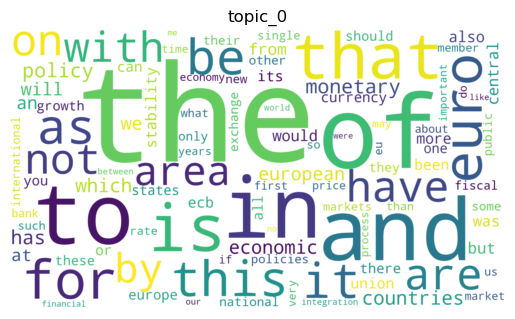

{'fiches': 0.08, 'highness': 0.08, 'goldplating': 0.08, 'goodness': 0.08, 'gothenburg': 0.08, 'carthaginian': 0.08, 'augments': 0.08, 'coining': 0.08, 'concurred': 0.08, 'belgië': 0.08, 'rivalries': 0.08, 'mastery': 0.08, 'moratoriums': 0.08, 'photo': 0.08, 'unesco': 0.08, 'februar': 0.08, 'pamplona': 0.08, 'orchestrate': 0.08, 'altar': 0.08, 'reaffirmation': 0.08, '1879': 0.08, 'arts': 0.08, 'parisienne': 0.08, 'vallée': 0.08, 'invariable': 0.08, 'summe': 0.08, 'compliments': 0.08, 'prepaid': 0.08, 'fortnightly': 0.08, 'forfeit': 0.08, 'referendums': 0.08, 'nerve': 0.08, 'aktionsplans': 0.08, 'provisionally': 0.08, 'lightening': 0.08, 'espionage': 0.08, 'meticulously': 0.08, 'lycée': 0.08, 'shelves': 0.08, 'deportation': 0.08, 'unaccountable': 0.08, 'surfacing': 0.08, '1881': 0.08, 'majesty': 0.08, 'l2': 0.08, 'ifri': 0.08, 'denounce': 0.08, 'plates': 0.08, 'waver': 0.08, 'hirsch': 0.08, 'alarmist': 0.08, 'busiest': 0.08, 'icon': 0.08, 'sylvia': 0.08, 'esprits': 0.08, 'sketches': 0.08

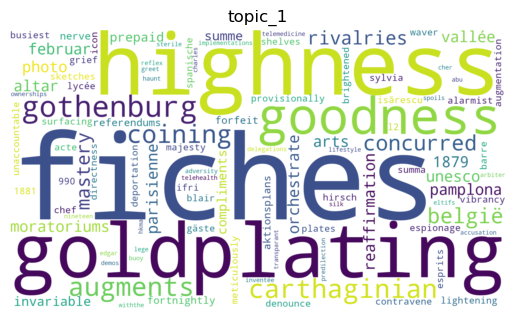

{'de': 4840.13, 'la': 3201.04, 'et': 1870.69, 'des': 1785.33, 'les': 1693.58, 'le': 1332.9, 'en': 1149.4, 'une': 797.08, 'dans': 774.08, 'que': 712.28, 'du': 691.43, 'un': 670.35, 'est': 652.0, 'euro': 588.79, 'pour': 515.08, 'par': 479.24, 'sur': 457.08, 'monétaire': 455.08, 'au': 442.08, 'qui': 431.72, 'plus': 397.8, 'zone': 387.09, 'il': 334.58, 'je': 275.82, 'ce': 270.08, 'européenne': 260.08, 'banque': 251.26, 'pas': 248.74, 'sont': 235.08, 'politique': 234.73, 'économique': 232.07, 'prix': 228.08, 'ne': 227.39, 'centrale': 226.84, 'nous': 225.08, 'aux': 219.08, 'stabilité': 216.08, 'qu': 214.08, 'monnaie': 209.71, 'ces': 205.05, 'se': 203.77, 'être': 202.27, 'ont': 195.08, 'cette': 195.07, 'pays': 186.7, 'avec': 184.08, 'été': 181.08, 'taux': 178.08, 'comme': 178.08, 'même': 171.08, 'marché': 169.08, 'unique': 157.3, 'marchés': 153.08, 'ou': 149.99, 'bce': 148.73, 'europe': 146.72, 'banques': 145.08, 'entre': 138.57, 'très': 137.08, 'terme': 136.08, 'elle': 135.08, 'union': 131.2

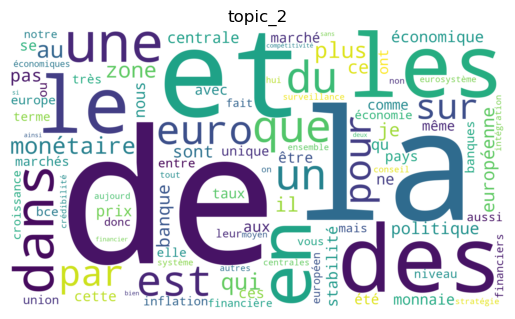

{'de': 15476.51, 'la': 8473.42, 'en': 5288.98, 'el': 4932.95, 'que': 4349.88, 'los': 4027.08, 'del': 3436.4, 'las': 2687.08, 'un': 1698.07, 'por': 1529.08, 'una': 1513.41, 'se': 1506.11, 'con': 1435.28, 'es': 1415.23, 'para': 1382.08, 'no': 1268.71, 'al': 1055.34, 'como': 949.08, 'euro': 877.71, 'política': 877.08, 'monetaria': 858.81, 'ha': 778.01, 'más': 777.08, 'su': 716.98, 'lo': 670.26, 'bce': 648.04, 'estabilidad': 609.08, 'este': 562.43, 'precios': 498.08, 'mercados': 476.08, 'banco': 444.47, 'inflación': 412.08, 'entre': 390.6, 'mercado': 390.08, 'plazo': 382.08, 'central': 373.83, 'crisis': 371.01, 'sobre': 370.08, 'crecimiento': 369.08, 'han': 368.08, 'países': 366.08, 'sus': 364.01, 'también': 363.08, 'sin': 356.7, 'economía': 341.66, 'esta': 328.08, 'zona': 323.3, 'desde': 323.08, 'europeo': 321.33, 'son': 300.52, 'financiera': 298.08, 'liquidez': 290.08, 'interés': 289.08, 'si': 286.09, 'europea': 274.83, 'riesgo': 273.08, 'puede': 270.08, 'bancos': 263.08, 'tanto': 262.24

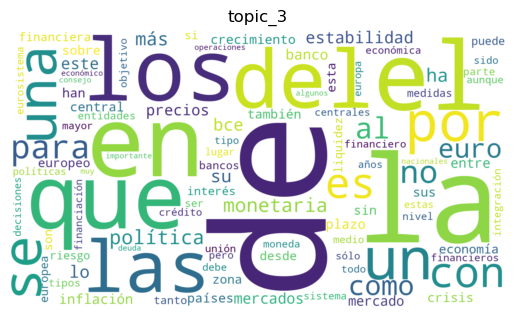

{'sehr': 50.0, 'premises': 36.12, 'construction': 31.58, 'bundesbank': 30.93, 'frankfurt': 28.66, 'geehrte': 25.19, 'herr': 24.13, 'geehrter': 21.22, 'frau': 20.46, 'memorial': 16.78, 'axel': 14.86, 'roth': 13.51, 'herren': 13.18, 'oberbürgermeisterin': 12.08, 'damen': 9.79, 'kollegen': 9.74, 'professor': 6.83, 'staff': 6.51, 'rodríguez': 5.78, 'weber': 5.7, 'stadt': 5.46, 'meine': 5.12, 'basement': 5.08, 'präsident': 4.99, 'köhler': 4.66, 'lieber': 4.36, 'und': 4.34, 'mayor': 4.15, '1993a': 4.06, 'bundeskanzler': 4.05, 'glück': 3.98, 'verehrte': 3.92, '2003b': 3.91, 'bundeskanzlerin': 3.9, '1993b': 3.87, 'carlo': 3.86, 'trichet': 3.74, 'ciampi': 3.7, 'claude': 3.6, 'gouverneur': 3.34, 'schlesinger': 3.06, 'willkommen': 2.97, 'mitarbeiter': 2.69, 'horst': 2.53, 'branches': 2.49, 'rome': 2.48, 'tag': 2.27, 'freue': 2.23, 'azeglio': 2.08, 'bundesminister': 2.08, 'staatsminister': 2.08, 'kinkel': 2.08, 'landscaping': 2.08, 'welteke': 2.08, 'storey': 2.07, 'foundation': 2.05, 'ecbfrankfurt

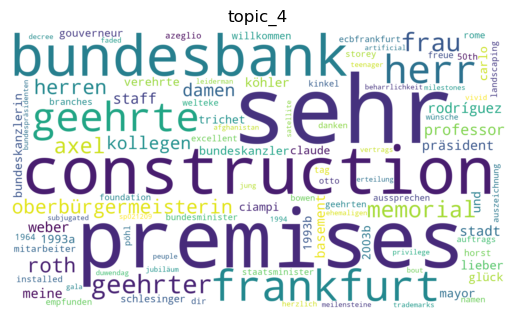

{'the': 158788.43, 'of': 89037.2, 'and': 67793.26, 'to': 63348.33, 'in': 60078.56, 'that': 28120.8, 'is': 25774.28, 'policy': 25230.85, 'for': 21573.11, 'on': 19497.49, 'financial': 16968.35, 'monetary': 16607.89, 'by': 15807.0, 'this': 15146.15, 'as': 14466.82, 'have': 13485.25, 'are': 12091.74, 'be': 12059.88, 'at': 10564.01, 'banks': 10318.57, 'with': 10225.67, 'crisis': 10217.99, 'it': 9933.0, 'bank': 9851.66, 'from': 9594.81, 'has': 9233.67, 'central': 8932.34, 'which': 8346.65, 'more': 8344.08, 'an': 8281.24, 'not': 8247.14, 'ecb': 7929.1, 'risk': 7788.09, 'market': 7647.74, 'rates': 7629.1, 'can': 7162.82, 'interest': 6975.46, 'we': 6955.28, 'their': 6694.18, 'area': 6583.55, 'rate': 6492.5, 'see': 6417.63, 'our': 6346.38, 'term': 6344.98, 'inflation': 6242.02, 'liquidity': 5998.89, 'economy': 5957.95, 'credit': 5919.73, 'but': 5917.05, 'these': 5819.51, 'economic': 5803.48, 'also': 5641.39, 'asset': 5640.94, 'may': 5612.42, 'stability': 5541.34, 'would': 5512.34, 'measures': 53

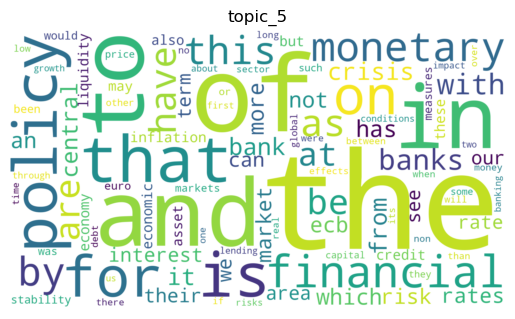

{'the': 126987.62, 'of': 64454.97, 'and': 50741.97, 'to': 49155.73, 'in': 38725.72, 'financial': 23629.56, 'for': 21635.1, 'is': 18335.08, 'that': 15542.28, 'be': 13777.81, 'as': 13407.15, 'on': 12740.05, 'banks': 12343.88, 'this': 11829.67, 'market': 11808.91, 'are': 10350.5, 'by': 10118.49, 'will': 9826.73, 'banking': 9042.16, 'with': 8872.57, 'it': 8675.69, 'european': 8604.88, 'have': 8025.91, 'has': 6384.47, 'system': 6253.62, 'markets': 6250.66, 'at': 6208.73, 'we': 6139.1, 'also': 6086.29, 'not': 5785.62, 'an': 5548.77, 'which': 5412.23, 'central': 5389.19, 'risk': 5352.81, 'ecb': 5212.45, 'from': 5207.22, 'euro': 5158.58, 'bank': 5116.2, 'integration': 5045.52, 'more': 4913.59, 'their': 4872.21, 'should': 4431.94, 'would': 4337.82, 'these': 4131.53, 'national': 4064.03, 'payment': 3987.46, 'or': 3891.81, 'institutions': 3872.08, 'all': 3847.99, 'area': 3835.77, 'eu': 3762.15, 'sector': 3742.42, 'supervisory': 3733.63, 'framework': 3611.86, 'supervision': 3581.21, 'can': 3521.77

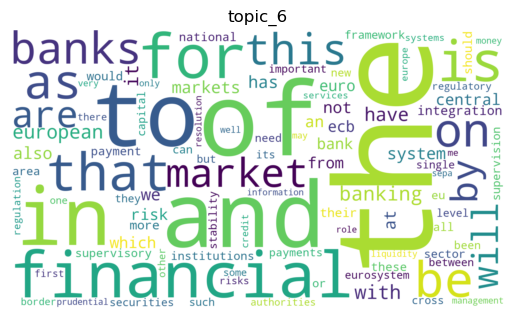

{'die': 11500.08, 'der': 10902.1, 'und': 7307.47, 'in': 4984.96, 'zu': 3537.08, 'den': 3165.72, 'für': 2723.9, 'im': 2652.16, 'von': 2579.31, 'auf': 2511.08, 'ist': 2511.08, 'des': 2486.83, 'das': 2228.08, 'eine': 2095.08, 'nicht': 1784.08, 'auch': 1783.08, 'mit': 1736.97, 'sich': 1633.08, 'es': 1544.54, 'dass': 1499.08, 'werden': 1393.08, 'ein': 1353.08, 'ezb': 1221.08, 'wir': 1208.08, 'als': 1206.06, 'sind': 1189.08, 'dem': 1155.9, 'einer': 1051.08, 'an': 1025.45, 'hat': 971.81, 'sie': 971.08, 'haben': 962.08, 'wie': 939.9, 'euro': 906.45, 'um': 897.08, 'wird': 894.08, 'zur': 828.08, 'bei': 803.08, 'ich': 800.23, 'geldpolitik': 765.08, 'diese': 750.08, 'vor': 733.08, 'über': 683.08, 'aus': 676.08, 'einen': 668.08, 'europäischen': 658.08, 'nur': 653.08, 'aber': 638.08, 'zum': 603.08, 'so': 591.76, 'durch': 585.08, 'einem': 571.08, 'nach': 567.08, 'euroraum': 556.08, 'kann': 547.08, 'währungsunion': 532.08, 'noch': 517.08, 'dies': 504.08, 'krise': 499.08, 'können': 496.08, 'dieser': 49

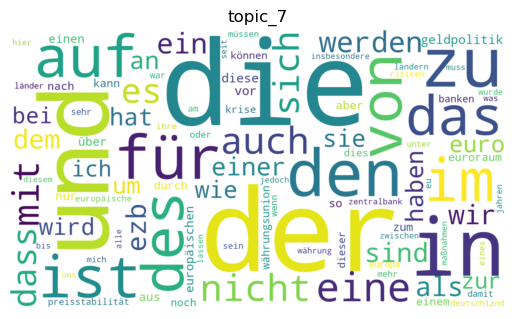

{'slides': 97.56, 'presentation': 87.08, 'content': 37.84, 'find': 36.46, 'related': 34.99, 'out': 34.84, 'see': 34.11, 'about': 33.39, 'download': 32.08, 'board': 31.44, 'executive': 28.32, 'from': 27.36, 'member': 26.6, 'more': 26.06, 'also': 24.68, 'annex': 20.71, 'ecb': 20.17, 'right': 18.18, 'pdf': 16.81, 'side': 14.37, 'available': 13.16, 'hand': 12.72, 'conference': 11.35, 'frankfurt': 10.37, 'praet': 9.96, 'peter': 9.94, 'mittelstand': 9.75, 'kb': 9.66, 'vice': 9.43, 'by': 9.06, 'organised': 8.58, 'benoît': 8.02, 'cœuré': 8.01, 'tides': 7.96, '2015': 7.84, 'at': 7.5, 'lorenzo': 7.02, 'format': 7.02, 'bini': 7.01, 'currents': 6.88, 'president': 6.78, 'main': 6.34, '2017': 6.25, 'smaghi': 6.02, 'sabine': 5.86, 'lautenschläger': 5.81, 'am': 5.78, 'vítor': 4.79, 'constâncio': 4.56, 'forum': 4.33, 'column': 4.08, 'präsentationsfolien': 4.06, 'paris': 3.93, 'february': 3.89, 'business': 3.83, '2016': 3.8, '18': 3.73, 'annual': 3.72, 'brussels': 3.59, 'october': 3.46, 'chair': 3.31, '

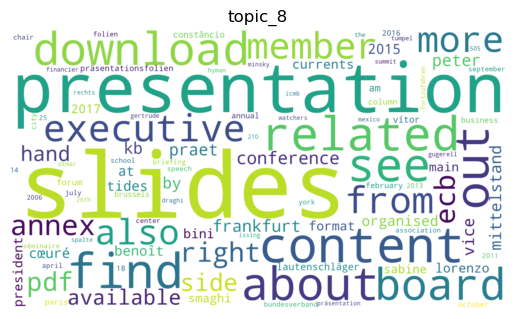

{'the': 66808.07, 'in': 31682.07, 'of': 27380.03, 'to': 25804.42, 'and': 19586.82, 'inflation': 13625.69, 'area': 12113.61, 'euro': 11625.35, 'growth': 9683.78, 'price': 8838.24, 'monetary': 8756.6, 'for': 7176.97, 'economic': 6755.18, 'our': 6699.64, 'on': 6612.78, 'term': 6390.48, 'ecb': 6171.5, 'by': 5675.93, 'stability': 5028.12, 'at': 4872.02, 'policy': 4847.94, 'as': 4813.06, 'this': 4758.8, 'is': 4757.96, 'has': 4572.07, 'with': 4442.25, 'rates': 4319.2, 'that': 4198.37, 'will': 4175.76, 'we': 4057.34, 'developments': 3978.81, 'medium': 3897.1, 'over': 3870.53, 'prices': 3804.88, 'have': 3527.53, 'labour': 3357.19, 'year': 3322.06, 'council': 2897.32, 'governing': 2732.32, 'also': 2607.42, 'are': 2505.97, 'rate': 2409.63, 'outlook': 2370.13, 'expectations': 2361.33, 'conditions': 2341.64, 'been': 2276.76, 'economy': 2214.78, 'since': 2212.29, 'its': 2201.17, 'further': 2174.67, 'be': 2101.71, 'interest': 2093.57, 'risks': 2068.27, 'measures': 2065.24, 'fiscal': 2045.03, 'structu

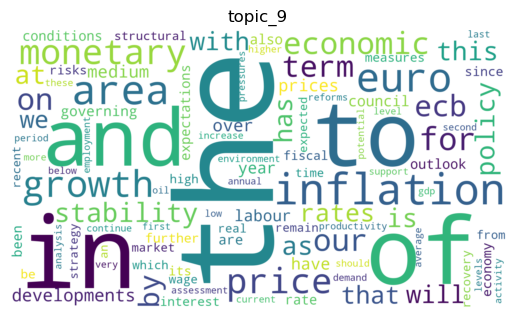

{'and': 8284.66, 'to': 5880.85, 'the': 4572.36, 'we': 3936.19, 'our': 3041.96, 'are': 3005.58, 'for': 2921.66, 'of': 2841.14, 'on': 2412.67, 'see': 2060.61, 'in': 1996.28, 'pandemic': 1892.04, 'digital': 1831.08, 'climate': 1747.45, 'that': 1731.34, 'is': 1693.01, '2020': 1618.72, 'global': 1388.46, '2021': 1372.08, 'european': 1349.49, '2019': 1239.92, 'change': 1226.68, 'but': 1151.99, 'by': 1120.17, 'ecb': 1095.59, '2018': 1070.66, '2022': 1060.08, 'could': 1029.97, 'it': 1024.1, 'will': 1017.26, 'at': 1014.95, 'risks': 993.93, 'energy': 990.78, 'more': 969.01, 'eu': 941.04, 'from': 938.39, 'their': 900.74, 'they': 857.97, 'people': 849.19, 'services': 841.92, 'as': 831.46, 'europe': 788.26, 'have': 786.2, 'with': 779.14, 'data': 770.29, 'speech': 768.62, 'payments': 763.63, 'also': 757.53, 'need': 751.44, 'no': 746.02, 'investment': 738.02, 'how': 724.22, 'today': 718.53, 'firms': 706.0, 'can': 696.36, 'transition': 693.41, 'green': 686.18, 'would': 662.34, 'chart': 619.07, 'workin

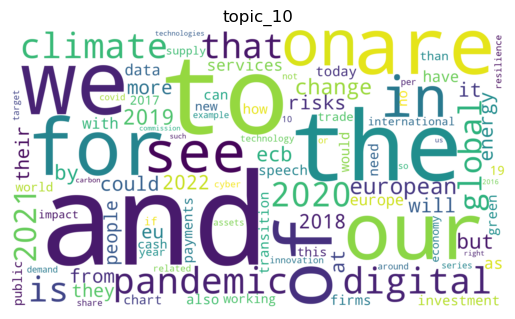

{'di': 1025.38, 'la': 530.78, 'il': 493.86, 'che': 481.08, 'in': 417.33, 'per': 396.0, 'del': 364.65, 'un': 348.62, 'dell': 286.68, 'della': 221.24, 'dei': 217.01, 'non': 215.82, 'le': 215.69, 'una': 191.75, 'delle': 180.08, 'si': 170.24, 'con': 143.6, 'nel': 138.08, 'sono': 134.08, 'al': 131.1, 'economia': 128.97, 'paesi': 127.08, 'più': 124.08, 'economica': 112.08, 'crescita': 106.08, 'politica': 103.55, 'da': 100.25, 'come': 98.62, 'europea': 98.33, 'gli': 94.59, 'alla': 93.08, 'cento': 91.08, 'all': 89.05, 'euro': 88.64, 'degli': 86.08, 'unione': 84.08, 'anche': 81.08, 'anni': 80.08, 'moneta': 79.92, 'monetaria': 78.35, 'se': 77.15, 'ma': 77.14, 'area': 73.11, 'questo': 73.08, 'ha': 72.15, 'stati': 67.08, 'essere': 63.08, 'nell': 63.08, 'tra': 61.08, 'cui': 60.08, 'italia': 59.2, 'nella': 59.08, 'internazionale': 56.45, 'dal': 56.08, 'europa': 55.88, 'può': 55.08, 'sistema': 54.38, 'hanno': 53.75, 'quella': 51.08, 'dalla': 50.08, 'istituzioni': 50.08, 'banca': 49.3, 'questa': 49.08

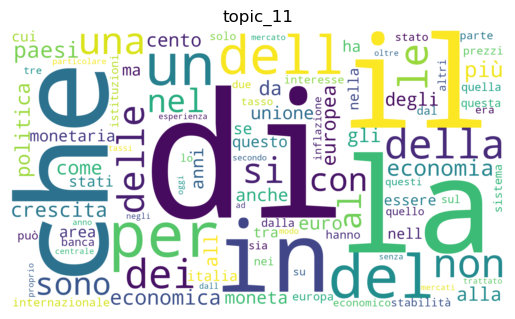

In [52]:
# Create Word Clouds
for t, topic in enumerate(LDA.components_):
    top_word_dict={voc[index]:topic[index] for index in np.argsort(-topic)[:max_words]}
    print({word: round(value,2) for word, value in top_word_dict.items()})
    wordcloud = WordCloud(max_words=max_words,
                          background_color="white",
                          collocations=False,
                          width=1920,
                          height=1080).generate_from_frequencies(top_word_dict)
    wordcloud.to_file("wordcloud_topic_"+str(t)+".pdf")
    plt.title("topic_"+str(t))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

## Spacy <a id=spacy>
[Back to Content Overview](#ov)

Spacy is a powerful library based on pre-trained language models. 

In [53]:
import sys
!{sys.executable} -m pip install spacy
!{sys.executable} -m spacy download en_core_web_sm
import spacy

     -------------------------------------- 12.2/12.2 MB 410.4 kB/s eta 0:00:00
     ---------------------------------------- 48.9/48.9 kB 2.4 MB/s eta 0:00:00
     ---------------------------------------- 2.2/2.2 MB 337.9 kB/s eta 0:00:00
     -------------------------------------- 96.8/96.8 kB 291.3 kB/s eta 0:00:00
     ------------------------------------ 482.8/482.8 kB 451.4 kB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 459.6 kB/s eta 0:00:00
     ------------------------------------ 181.6/181.6 kB 342.8 kB/s eta 0:00:00
     ---------------------------------------- 7.0/7.0 MB 438.2 kB/s eta 0:00:00
  Using cached colorama-0.4.6-py2.py3-none-any.whl (25 kB)
  Attempting uninstall: colorama
    Found existing installation: colorama 0.4.5
    Uninstalling colorama-0.4.5:
      Successfully uninstalled colorama-0.4.5


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
anaconda-project 0.11.1 requires ruamel-yaml, which is not installed.


     -------------------------------------- 12.8/12.8 MB 347.5 kB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [54]:
# Define your language processing model
nlp = spacy.load("en_core_web_sm")
print(nlp)

In [55]:
print(df['contents'][0][:1000])

  SPEECH  The euro area hiking cycle: an interim assessment   Dow Lecture by Philip R. Lane, Member of the Executive Board of the ECB, at the National Institute of Economic and Social Research London, 16 February 2023     Introduction It is an honour to deliver this year’s Dow Lecture. Christopher Dow had a distinguished career as an applied macroeconomist, both in the United Kingdom (at the Bank of England, the Treasury and here at NIESR) and internationally (as OECD Chief Economist from 1963 to 1973).[1] Moreover, he extensively analysed my topic today – the impact of interest rate movements on the financial system, the economy and inflation – including in the context of the cost-push inflation pressures of the 1970s and 1980s.[2] While the current inflation environment is quite different in many respects – having been driven predominantly by extraordinary external factors such as the COVID-19 pandemic, supply bottlenecks and energy shocks – much can still be learned by re-visiting t

In [56]:
# Define the document object
doc=nlp(df['contents'][0])

In [57]:
#Iterate over sentences
for sent in doc.sents:
    print(sent)
    print('\n'*3)

  SPEECH  The euro area hiking cycle: an interim assessment   Dow Lecture by Philip R. Lane, Member of the Executive Board of the ECB, at the National Institute of Economic and Social Research London, 16 February 2023     




Introduction




It is an honour to deliver this year’s Dow Lecture.




Christopher Dow had a distinguished career as an applied macroeconomist, both in the United Kingdom (at the Bank of England, the Treasury and here at NIESR) and internationally (as OECD Chief Economist from 1963 to 1973).[1]




Moreover, he extensively analysed my topic today – the impact of interest rate movements on the financial system, the economy and inflation – including in the context of the cost-push inflation pressures of the 1970s and 1980s.[2]




While the current inflation environment is quite different in many respects – having been driven predominantly by extraordinary external factors such as the COVID-19 pandemic, supply bottlenecks and energy shocks – much can still be lea

In [58]:
#Iterate over tokens
for token in doc[:25]:
    print((token.text+' '*15)[:15], (token.lemma_+' '*15)[:15], token.pos_, token.tag_, (token.dep_+' '*8)[:8],
            token.shape_, token.is_alpha, token.is_stop, sep='\t')

               	               	SPACE	_SP	dep     	  	False	False
SPEECH         	SPEECH         	VERB	VBD	ROOT    	XXXX	True	False
               	               	SPACE	_SP	dep     	 	False	False
The            	the            	DET	DT	det     	Xxx	True	True
euro           	euro           	ADJ	JJ	compound	xxxx	True	False
area           	area           	NOUN	NN	compound	xxxx	True	False
hiking         	hiking         	NOUN	NN	compound	xxxx	True	False
cycle          	cycle          	NOUN	NN	dobj    	xxxx	True	False
:              	:              	PUNCT	:	punct   	:	False	False
an             	an             	DET	DT	det     	xx	True	True
interim        	interim        	ADJ	JJ	amod    	xxxx	True	False
assessment     	assessment     	NOUN	NN	appos   	xxxx	True	False
               	               	SPACE	_SP	dep     	  	False	False
Dow            	Dow            	PROPN	NNP	compound	Xxx	True	False
Lecture        	Lecture        	PROPN	NNP	appos   	Xxxxx	True	False
by             	by           

<span style="color:blue"><b>Task:</b></span> Create a string with only the nouns remaining in the article.

<span style="color:blue"><b>Task:</b></span> Lemmatize the text. Delete all non alpha and stop words.

### Excursus: Mulitprocessing
Spacy tokenizing is relatively slow, but the process can  be parallelized:

In [ ]:
from joblib import Parallel, delayed

First we have to split the data into batches, as loading the model in a sub-process for each document would be too costly.

In [ ]:
def make_batches(_list,n_batches=10):
    len_batch=len(_list)//n_batches+1
    return [_list[i*len_batch:min((i+1)*len_batch,len(_list))] for i in range(n_batches)]

In [ ]:
batches=make_batches(df['contents'],36)
print(batches)

Then we need to define a function that does the work in each sub-process.

In [ ]:
def lemmatizer(texts:list)->list:
    nlp = spacy.load("en_core_web_sm")
    return [' '.join([token.lemma_ for token in  nlp(text) if token.is_alpha]) for text in texts]

Now we can run the task in ``n_jobs`` parallel tasks. Select ``n_jobs`` just below your available threads (usually the number of CPU cores times two).

In [ ]:
results=Parallel(n_jobs=12,verbose=50)(delayed(lemmatizer)(batch) for batch in batches)
print(results)

In [ ]:
#Unpack the nested results
df['lemma'] =[lemma for batch in results for lemma in batch]

In [ ]:
print(df['lemma'])

<span style="color:blue"><b>Task:</b></span> Count the 'negative', 'positive', 'uncertainty' words in the texts using muliple threads. (Batches are not required for optimal performance.)